### Análisis de películas:

Trabajando en equipo, determinar:

* ¿Cuál es el nombre de la película más popular? Obtener el top 10
* ¿Cuantas películas vieron los H y M?
* ¿Donde se ven las top 10 películas más populares?

Use el barplot para gráficas cada punto.

Criterio de popularidad definido:

Una película popular es aquella que tiene una gran cantidad de calificaciones favorables y está calificada por usuarios de diversas regiones, i.e.

* +calificaciones buenas
* +códigos postales

In [1]:
# Se cargan las librerías

library("dplyr")
library("readr")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
# Lee la información de los archivos
usuarios <- read.table("./movies_data/u.user", header = TRUE, sep = "|")
peliculas <- read.table("./movies_data/u.item", header = TRUE, sep = "|")
calificaciones <- read.table("./movies_data/udata.data", header = TRUE, sep = "\t")

In [3]:
# Unir las tablas
datos <- left_join(calificaciones, usuarios, by = c("userid"="userid"))
datos <- left_join(datos, peliculas, by = c("itemid"="itemid"))

In [4]:
datos[1:3, ]

,userid,itemid,rate,timestamp,age,gender,occupation,zcode,title,rdate,⋯,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
,<int>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,⋯,0,0,0,0,0,0,0,0,0,0
2,186,302,3,891717742,39,F,executive,00000,L.A. Confidential (1997),01-Jan-1997,⋯,0,1,0,0,1,0,0,1,0,0
3,22,377,1,878887116,25,M,writer,40206,Heavyweights (1994),01-Jan-1994,⋯,0,0,0,0,0,0,0,0,0,0


In [5]:
# Cambiamos los nombres de las columnas:
datos <- datos %>% rename(movieid = itemid)
colnames(datos)

[1] "userid"      "movieid"     "rate"        "timestamp"   "age"        
 [6] "gender"      "occupation"  "zcode"       "title"       "rdate"      
[11] "vrdate"      "IMDbURL"     "unknown"     "Action"      "Adventure"  
[16] "Animation"   "Children"    "Comedy"      "Crime"       "Documentary"
[21] "Drama"       "Fantasy"     "FilmNoir"    "Horror"      "Musical"    
[26] "Mystery"     "Romance"     "SciFi"       "Thriller"    "War"        
[31] "Western"

Para responder a la pregunta...

* ¿Cuál es el nombre de la película más popular?

... vamos a conocer primero las películas con más calificaciones. A partir de ahí, obtendremos aquellas mejor calificadas

In [6]:
# De la tabla de datos, obtén las películas con más calificaciones
mas_calif <- datos %>% group_by(movieid) %>% summarise(n_calif = n())
class(mas_calif)

[1] "tbl_df"     "tbl"        "data.frame"

In [7]:
mas_calif[1:3, ]
length(mas_calif$movieid)

movieid,n_calif
<int>,<int>
1,452
2,131
3,90


[1] 1682

In [8]:
# A partir del id de la película, obtén un promedio de las calificaciones y ordénalo descendentemente
califs_promedio <- datos %>% group_by(movieid) %>% summarise(calif_promedio = mean(rate)) %>% arrange(desc(calif_promedio))


In [9]:
# Unir las tablas de las películas con más calificaciones y las calificaciones promedio
info_peliculas <- left_join(mas_calif, califs_promedio, by = c("movieid"="movieid"))
info_peliculas[1:3, ]

movieid,n_calif,calif_promedio
<int>,<int>,<dbl>
1,452,3.878319
2,131,3.206107
3,90,3.033333


In [10]:
# Aún es necesario obtener aquellas películas que han sido calificadas por usuarios
# de una cantidad más diversa de regiones. La región se obtiene del primer dígito del
# código postal del usuario

# Se obtiene el primer dígito del código postal en una nueva columna
datos <- datos %>% mutate(region = substr(zcode, 1, 1))
# Se obtiene el número de regiones en las que ha sido calificada cada película
calif_por_region <- datos %>% group_by(movieid) %>% summarise(n_regiones = n_distinct(region))
# Se unen las tablas
info_peliculas <- left_join(info_peliculas, calif_por_region, by = c("movieid"="movieid"))
info_peliculas[1:3, ]

movieid,n_calif,calif_promedio,n_regiones
<int>,<int>,<dbl>,<int>
1,452,3.878319,18
2,131,3.206107,12
3,90,3.033333,13


In [11]:
# Conozcamos el tamaño del set de datos
length(info_peliculas$movieid)

[1] 1682

In [12]:
# Agregamos la información de las películas
info_peliculas <- left_join(info_peliculas, peliculas, by = c("movieid"="itemid"))

In [13]:
# Tomando el cuenta que tenemos 1682 películas, se tomará una muestra de 100 películas
# para realizar el análisis. Primero, se ordena la tabla de películas por el número de
# calificaciones y se toma una muestra de 100 películas
top100_mas_calif <- info_peliculas %>% arrange(desc(n_calif)) %>% slice(1:100)

In [14]:
# Segundo, se ordena la tabla de películas por el promedio de calificaciones y se toma
# una muestra de 10 películas
top10_promedio <- top100_mas_calif %>% arrange(desc(calif_promedio)) %>% slice(1:10)

In [15]:
# Finalmente, ordenamos las 10 películas según el número de regiones en las que han sido calificadas
top10_mas_populares <- top10_promedio %>% arrange(desc(n_regiones))

movieid,title,n_calif,calif_promedio,n_regiones
<int>,<chr>,<int>,<dbl>,<int>
50,Star Wars (1977),583,4.358491,18
127,"Godfather, The (1972)",413,4.283293,16
318,Schindlers List (1993),298,4.466443,15
483,Casablanca (1942),243,4.456790,15
12,"Usual Suspects, The (1995)",267,4.385768,15
174,Raiders of the Lost Ark (1981),420,4.252381,15
64,"Shawshank Redemption, The (1994)",283,4.445230,14
357,One Flew Over the Cuckoos Nest (1975),264,4.291667,14
98,"Silence of the Lambs, The (1991)",390,4.289744,14


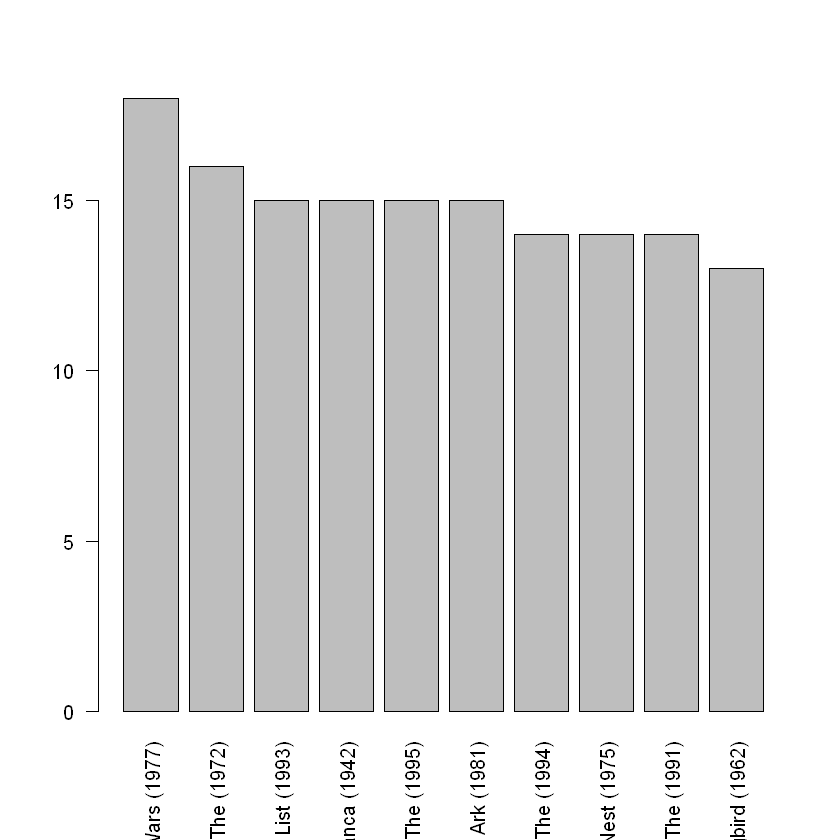

In [27]:
# Mostramos el nombre de las películas, el número de calificaciones, el promedio de calificaciones
# y el número de regiones, así como desplegamos en un gráfico el número de regiones en el eje y y
# el nombre de las películas en el eje x
pelis_n_regiones <- top10_mas_populares %>% select(title, n_regiones)
barplot(pelis_n_regiones$n_regiones, names.arg = pelis_n_regiones$title, las = 2)
top10_mas_populares %>% select(movieid, title, n_calif, calif_promedio, n_regiones)


Ahora, respondamos a la pregunta

* ¿Cuantas películas vieron los H y M?

In [17]:
# Mostrar la longitud de datos
length(datos$movieid)

# Filtramos la posibilidad de que una película haya sido calificada más de una vez por el mismo usuario
datos_solo_una_calif <- datos %>% distinct(movieid, userid)
length(datos_solo_una_calif$movieid)

[1] 100000

[1] 100000

gender,n_pelis
<chr>,<int>
F,25740
M,74260


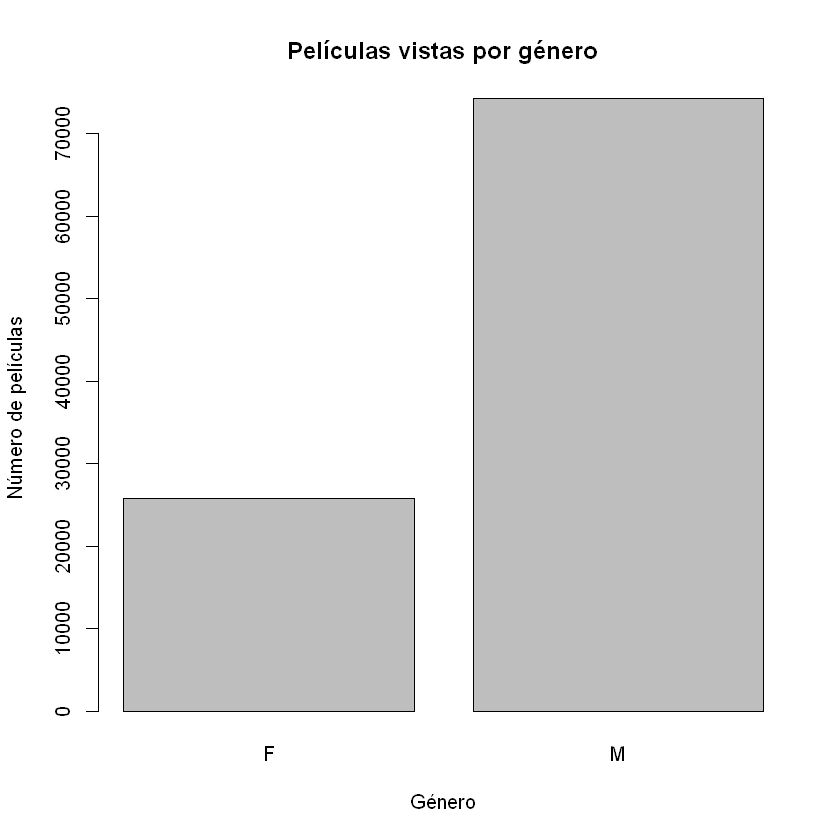

In [18]:
# Sabiendo que cada usuario calificó sólo una vez cada película, podemos obtener cuántas películas vieron.
# Ahora, obtenemos el número de películas que vieron los usuarios hombres y mujeres

pelis_por_sexo <- datos %>% group_by(gender) %>% summarise(n_pelis = n())
pelis_por_sexo
barplot(pelis_por_sexo$n_pelis, names.arg = pelis_por_sexo$gender, xlab = "Género", ylab = "Número de películas", main = "Películas vistas por género")

Finalmente, deebemos responder la pregunta

* ¿Donde se ven las top 10 películas más populares?

Primero, es necesario definir que para responder esta pregunta se tomará la región que aparezca más veces para la calificación de una película, con lo que se obtendrá una lista de 10 regiones (posiblemente con valores repetidos)

In [21]:
# Ya tenemos localizadas las regiones en las que se han calificado las películas en el dataframe datos.
# Primero, es necesario filtrar las 10 películas más populares del dataframe datos, para luego
# obtener la región en la que se ha calificado cada película y de ahí determinar cuál es la región
# que más aparece en cada calificación

# Obtenemos las calificaciones de las 10 películas más populares
datos_top10 <- datos %>% filter(movieid %in% top10_mas_populares$movieid)

# Obtenemos la región en la que se ha calificado cada película
datos_top10_regiones <- datos_top10 %>% select(movieid, region)

In [23]:
datos_top10_regiones[1:10, ]

,movieid,region
,<int>,<chr>
1,98,5
2,427,0
3,174,6
4,427,9
5,427,2
6,98,7
7,98,2
8,174,9
9,483,9


In [26]:

# Determinamos cuál es la región que más aparece en cada calificación por película
regiones_top10 <- datos_top10_regiones %>% group_by(movieid) %>% summarise(region_mas_frecuente = names(which.max(table(region))))
regiones_top10[1:10, ]

movieid,region_mas_frecuente
<int>,<chr>
12,9
50,9
64,9
98,9
127,9
174,9
318,9
357,9
427,9
